# Objectives of the Notebook 

 *  **Building a neural network with the best accuracy possible and testing it's accuracy**
 
 *  **Give it a glance look at the data**
 
 *  **Showing the result in confusion matrix**
 
 

# Importing libraries

In [1]:
import numpy as np 
import pandas as pd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import itertools
from sklearn.metrics import f1_score

Inputing the data 

In [2]:
df=pd.read_csv(r'../input/hotel-booking-demand/hotel_bookings.csv')

Is the data balanced ? To this we need to have all the data that is canceled and the data where is not canceled

Separating what is the canceled data.

In [3]:
cancelled=df.loc[(df['is_canceled']==1)]

In [4]:
a=100*(cancelled.shape[0]/df.shape[0])
print("Percentage of the canceled values  " + str(a))
print('Percentge of the non canceled values  '+ str(100-a))

Percentage of the canceled values  37.041628277075134
Percentge of the non canceled values  62.958371722924866


As we can see the dataset is not balanced but the difference is not that big we can change our aproach by changing evaluation metrics.

In [5]:
df.pop('reservation_status_date')
df.pop('arrival_date_year')

0         2015
1         2015
2         2015
3         2015
4         2015
          ... 
119385    2017
119386    2017
119387    2017
119388    2017
119389    2017
Name: arrival_date_year, Length: 119390, dtype: int64

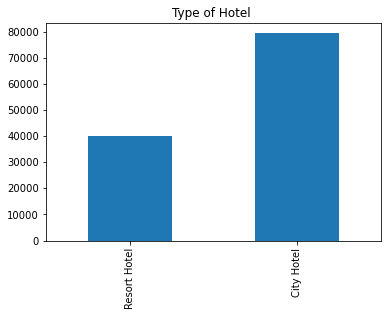

In [6]:
df['hotel'].value_counts().sort_values().plot(kind='bar')
plt.title('Type of Hotel ')
plt.show()

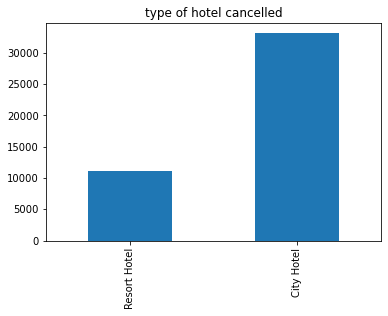

In [7]:
cancelled['hotel'].value_counts().sort_values().plot(kind='bar')
plt.title('type of hotel cancelled')
plt.show()

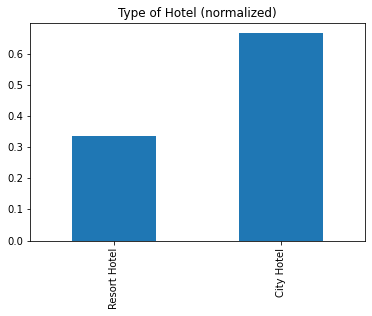

In [8]:
df['hotel'].value_counts(normalize=True).sort_values().plot(kind='bar')
plt.title('Type of Hotel (normalized)')
plt.show()

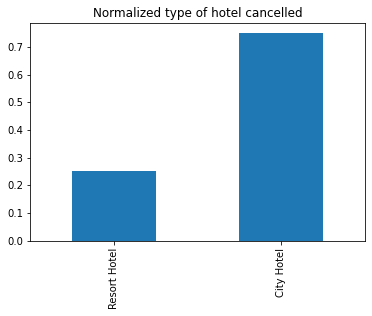

In [9]:
cancelled['hotel'].value_counts(normalize=True).sort_values().plot(kind='bar')
plt.title('Normalized type of hotel cancelled')
plt.show()

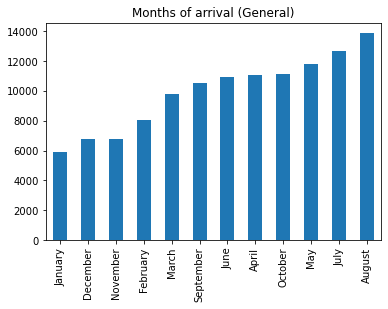

In [10]:
df['arrival_date_month'].value_counts().sort_values().plot(kind = 'bar')
plt.title('Months of arrival (General)')
plt.show()

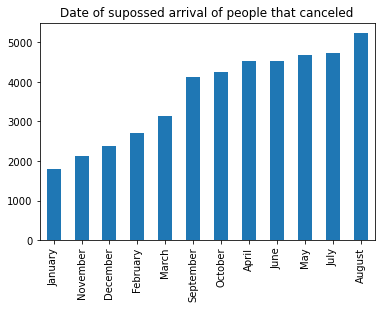

In [11]:
cancelled['arrival_date_month'].value_counts().sort_values().plot(kind='bar')
plt.title('Date of supossed arrival of people that canceled')
plt.show()

In [12]:
print(df['adults'].value_counts())

2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
55        1
50        1
40        1
10        1
6         1
Name: adults, dtype: int64


Removing outliers

In [13]:
df=df.loc[(df['adults']<20)]

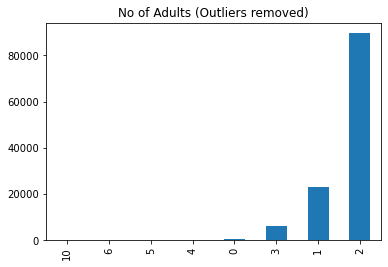

In [14]:
df['adults'].value_counts().sort_values().plot(kind='bar')
plt.title('No of Adults (Outliers removed)')
plt.show()

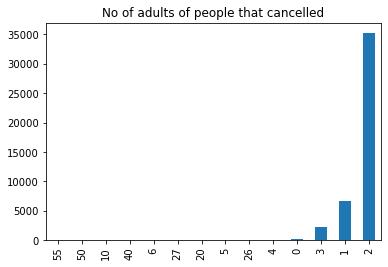

In [15]:
cancelled['adults'].value_counts().sort_values().plot(kind='bar')
plt.title('No of adults of people that cancelled')
plt.show()

In [16]:
print(df['children'].value_counts())

0.0     110784
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64


Another outlier

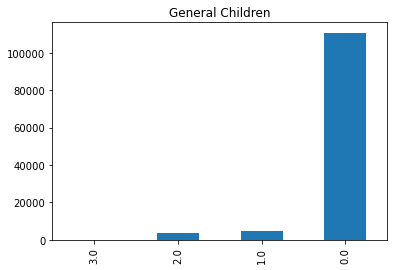

In [17]:
df=df.loc[(df['children']<10)]
df['children'].value_counts().sort_values().plot(kind='bar')
plt.title('General Children')
plt.show()

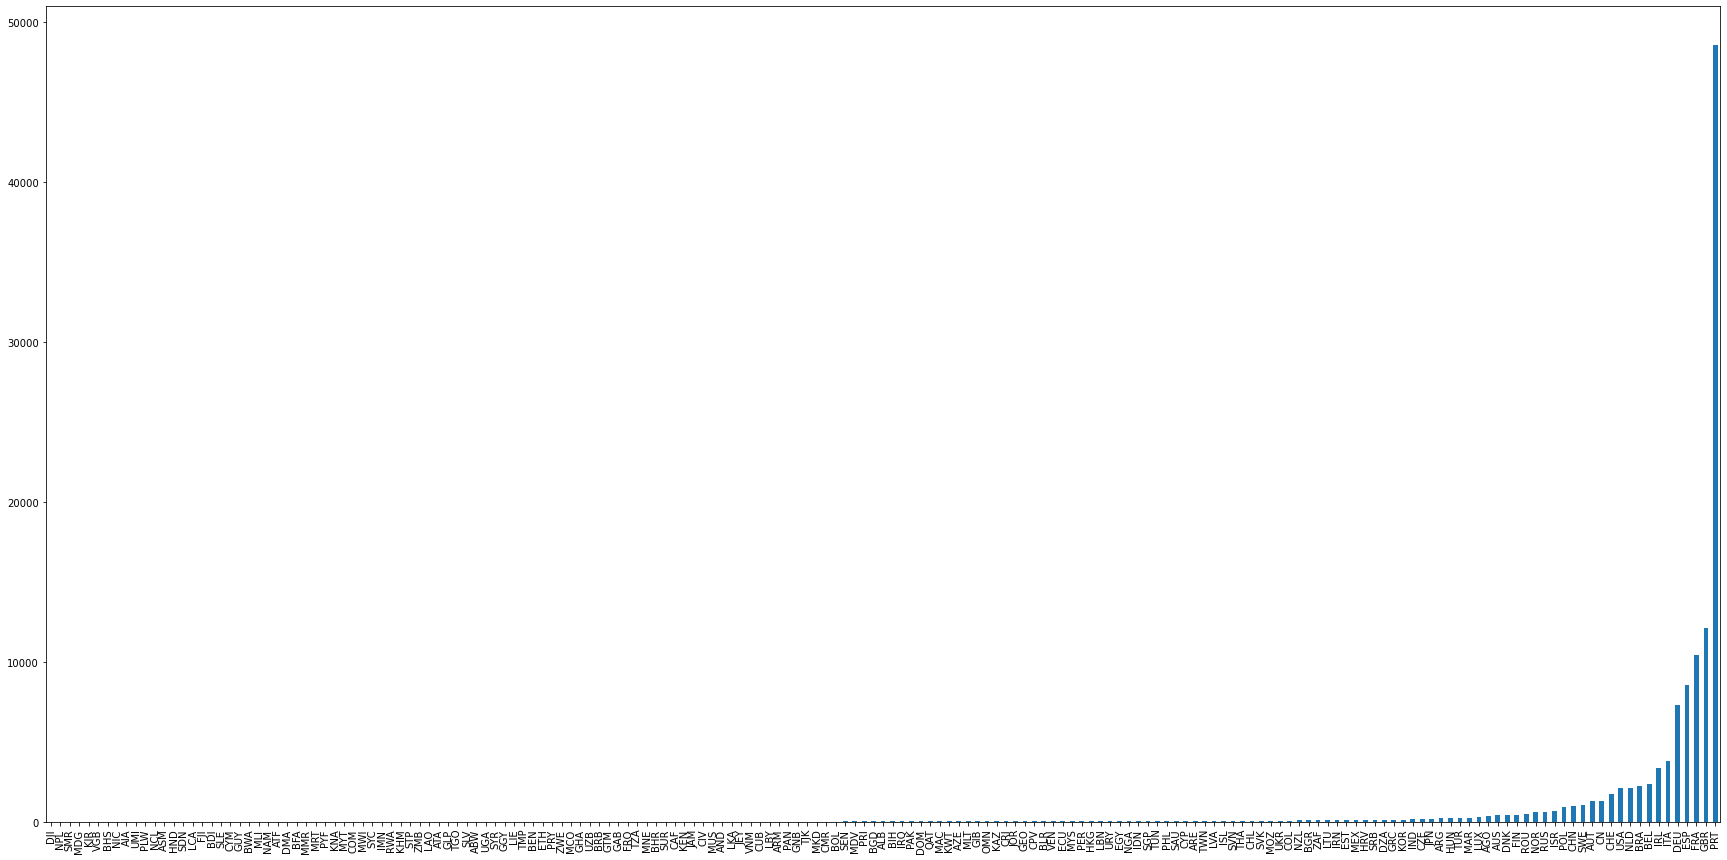

PRT    48573
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
NAM        1
CYM        1
SLE        1
LCA        1
DJI        1
Name: country, Length: 177, dtype: int64


In [18]:
plt.figure(figsize=(30,15))
df['country'].value_counts().sort_values().plot(kind='bar')
plt.show()
print(df['country'].value_counts())

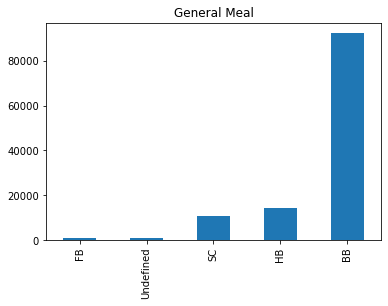

In [19]:
# How much of it with meal 
df['meal'].value_counts().sort_values().plot(kind='bar')
plt.title('General Meal')
plt.show()

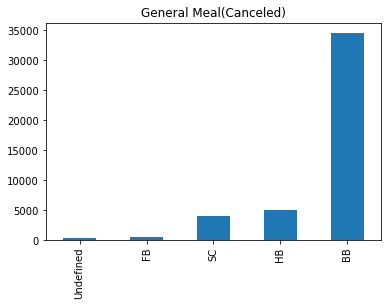

In [20]:
# How much of it with meal canceled
cancelled['meal'].value_counts().sort_values().plot(kind='bar')
plt.title('General Meal(Canceled)')
plt.show()

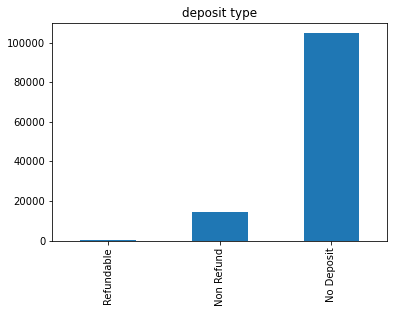

In [21]:
df['deposit_type'].value_counts().sort_values().plot(kind='bar')
plt.title('deposit type')
plt.show()

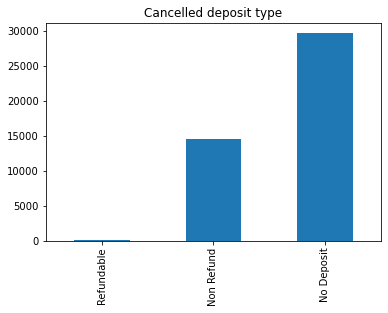

In [22]:
cancelled['deposit_type'].value_counts().sort_values().plot(kind='bar')
plt.title('Cancelled deposit type')
plt.show()

Transforming Categorical to Numerical

In [23]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

Looking at the number of nan and replacing then by zero 

In [24]:
df=df.fillna(0)
print (df.isna().any(axis=-0))

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
country                           False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                             False
company                           False
days_in_waiting_list              False


# Building our model using tensor flow

In [25]:

y=np.array(df.pop('is_canceled'))

x=df.values

x_train,x_test,y_train,y_test=train_test_split(x,y)

In [26]:
epochs=15

model = keras.Sequential([
    keras.layers.Dense(32,input_shape=(29,),activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=epochs,validation_split=0.1,verbose=0)


In [27]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


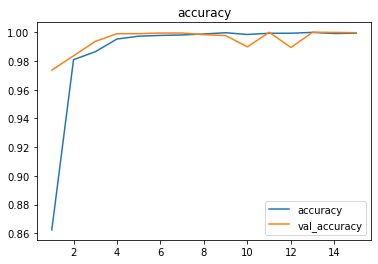

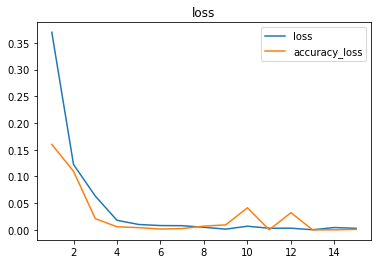

Confusion matrix, without normalization
[[18744     1]
 [    3 11096]]


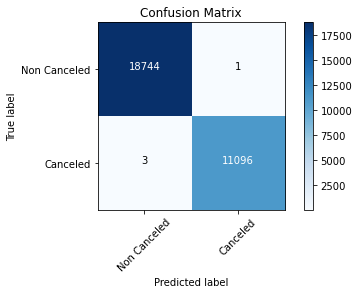

In [28]:

history=history.history
epochs_num=np.arange(1,epochs+1)

plt.figure(0)
plt.title('accuracy')
plt.plot(epochs_num,history['accuracy'],label='accuracy')
plt.plot(epochs_num,history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

plt.figure(0)
plt.title('loss')
plt.plot(epochs_num,history['loss'],label='loss')
plt.plot(epochs_num,history['val_loss'],label='accuracy_loss')
plt.legend()
plt.show()

comp=model.predict(x_test)
comp=np.array([np.argmax(u) for u in comp])
cm = confusion_matrix(y_true=y_test, y_pred=comp)
plot_confusion_matrix(cm=cm,classes=['Non Canceled','Canceled'],title='Confusion Matrix')
plt.show()


Normalized confusion matrix
[[9.99946652e-01 5.33475593e-05]
 [2.70294621e-04 9.99729705e-01]]


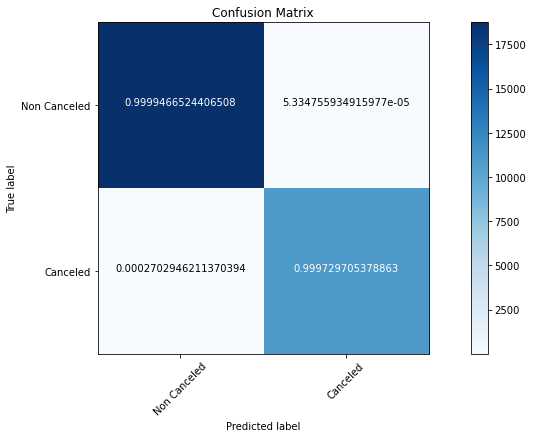

F1 score 0.9998197873490718


In [29]:
plt.figure(figsize=(12,6))
cm = confusion_matrix(y_true=y_test, y_pred=comp)
plot_confusion_matrix(cm=cm,classes=['Non Canceled','Canceled'],title='Confusion Matrix',normalize=True)
plt.show()
print('F1 score '+str(f1_score(y_true=y_test,y_pred=comp)))

# Conclusion

Being very sincere with the person who reads this notebook. I am very suspicious of the notebook results maybe there are hidden in some data something date relates directly when is canceled or not. 
If this is not true this result is amazing it predicted with a great precision showing that a neural network may be the best solution to the prediction of cancelation or not. 
Other possible solution is that i got lucky in the training of the neural net, but is really suspicious the precision being so high if someone have a clue what may be happening please leave a comment
   
   **If you enjoyed the Notebook give it an Up and Thank you**
